In [1]:
import numpy as np  # np mean, np random
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('wastestats.csv')

In [2]:
data.describe

<bound method NDFrame.describe of                             waste_type  waste_disposed_of_tonne  \
0                                 Food                   679900   
1                      Paper/Cardboard                   576000   
2                             Plastics                   762700   
3                                  C&D                     9700   
4                  Horticultural waste                   111500   
..                                 ...                      ...   
295                 Non-ferrous metal                      2000   
296                             Glass                     52000   
297                       Scrap tyres                      3000   
298  Others (stones, ceramics, etc. )                    274000   
299                              Total                  2969000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                        111100                       791000            0.14   
1

In [3]:
data.shape

(300, 6)

In [4]:
data.head

<bound method NDFrame.head of                             waste_type  waste_disposed_of_tonne  \
0                                 Food                   679900   
1                      Paper/Cardboard                   576000   
2                             Plastics                   762700   
3                                  C&D                     9700   
4                  Horticultural waste                   111500   
..                                 ...                      ...   
295                 Non-ferrous metal                      2000   
296                             Glass                     52000   
297                       Scrap tyres                      3000   
298  Others (stones, ceramics, etc. )                    274000   
299                              Total                  2969000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                        111100                       791000            0.14   
1    

In [5]:
data = data.sort_values(by="year")
overall = data[(data["waste_type"] == "Overall") | (data["waste_type"] == "Total")]


fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=overall["year"],
        y=overall["total_waste_generated_tonne"],
        name="Waste Generated",
    )
)

fig.add_trace(
    go.Bar(
        x=overall["year"],
        y=overall["total_waste_recycled_tonne"],
        name="Waste Recycled",
    )
)

fig.show()

In [6]:
data[data['year']==2022]

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
225,Ferrous metal,7000,1331000,1338000,0.99,2022
226,Paper/Cardboard,671000,394000,1065000,0.37,2022
227,Construction & Demolition,5000,1419000,1424000,0.99,2022
228,Plastics,944000,57000,1001000,0.06,2022
229,Food,667000,146000,813000,0.18,2022
230,Horticultural,32000,188000,220000,0.85,2022
233,Textile/Leather,249000,5000,254000,0.02,2022
232,Ash & sludge,213000,27000,240000,0.11,2022
238,"Others (stones, ceramics, etc.)",219000,30000,249000,NaN,2022
234,Used slag,2000,166000,168000,0.99,2022


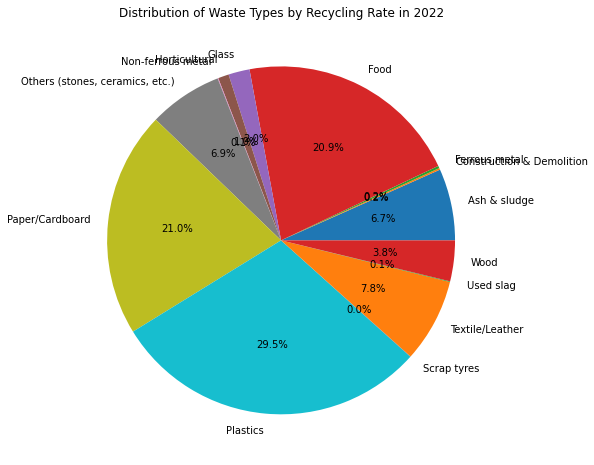

In [7]:
# Filter data for the year 2022
data_2022 = data[(data['waste_type'] != 'Total') & (data['year'] == 2022)]

# Calculate the sum of recycling_rate for each waste_type
grouped_data = data_2022.groupby('waste_type')['waste_disposed_of_tonne'].sum()

# Create pie chart for waste_type and recycling_rate in 2022
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Distribution of Waste Types by Recycling Rate in 2022')
plt.show()

In [8]:
data['waste_type'].value_counts()

Total                                      20
Textile/Leather                            16
Glass                                      16
Paper/Cardboard                            16
Plastics                                   15
Others (stones, ceramics & rubber etc)     12
Sludge                                     11
Non-ferrous Metals                         11
Scrap Tyres                                11
Construction Debris                        11
Used Slag                                  11
Wood/Timber                                11
Horticultural Waste                        11
Food waste                                 11
Ferrous Metal                               7
Wood                                        5
Ferrous metal                               5
Used slag                                   5
Scrap tyres                                 5
Food                                        5
Horticultural                               4
Scrap tyres                       

In [9]:
data["waste_type"] = data["waste_type"].str.replace(
    "Non-ferrous metal", "Non-Ferrous Metal"
    )
data["waste_type"] = data["waste_type"].str.replace(
    "Non-ferrous metals", "Non-Ferrous Metal"
    )
data["waste_type"] = data["waste_type"].str.replace(
    "Non-Ferrous Metals", "Non-Ferrous Metal"
    )
data["waste_type"] = data["waste_type"].str.replace(
    "Plastics", "Plastic"
    )
data["waste_type"] = data["waste_type"].str.replace(
    "Ferrous metal", "Ferrous Metal"
    )
data["waste_type"] = data["waste_type"].str.replace(
    "Paper/Cardboard", "Paper"
    )

In [10]:
data.groupby(by=["waste_type"]).mean()[
    "recycling_rate"
    ].to_frame().style.\
    background_gradient(cmap="Pastel1_r", subset=["recycling_rate"])

,recycling_rate
waste_type,
Ash & Sludge,0.136667
Ash & sludge,0.110000
Ash & sludge,0.090000
Ash and sludge,0.120000
C&D,0.990000
C&D,0.990000
Construction & Demolition,0.990000
Construction & Demolition (C&D),0.990000
Construction Debris,0.971818


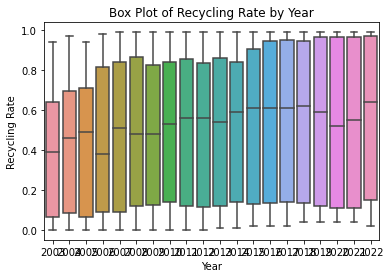

In [11]:
# Box plot of recycling_rate by year
sns.boxplot(x='year', y='recycling_rate', data=data)
plt.xlabel('Year')
plt.ylabel('Recycling Rate')
plt.title('Box Plot of Recycling Rate by Year')
plt.show()

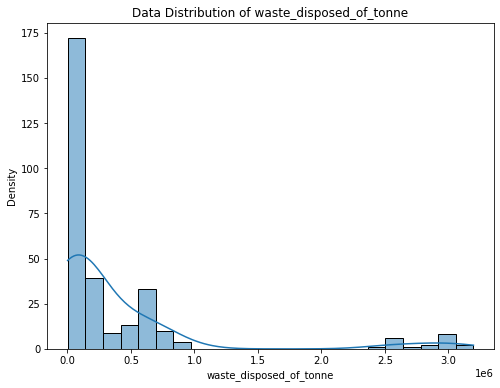

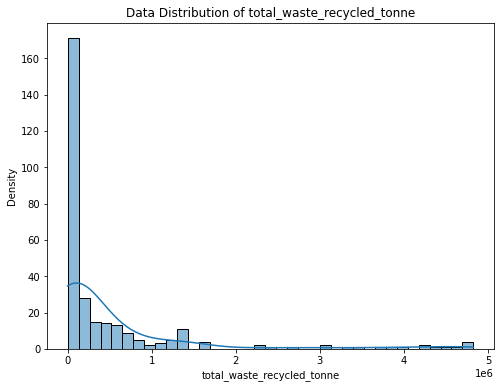

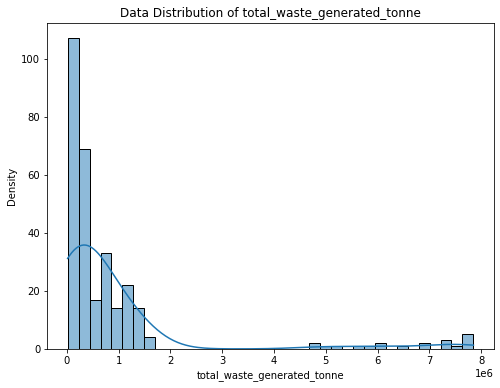

In [12]:
# Plot histograms and KDEs for numeric columns
numeric_cols = ['waste_disposed_of_tonne', 'total_waste_recycled_tonne', 'total_waste_generated_tonne']
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Data Distribution of {col}')
    plt.show()

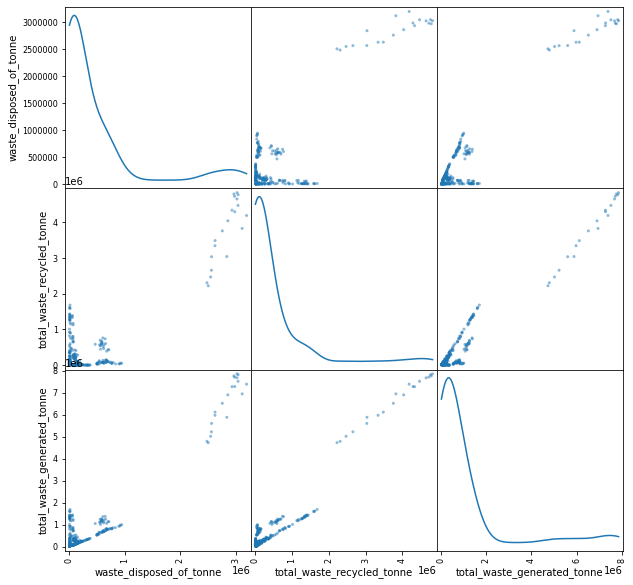

In [13]:
from pandas.plotting import scatter_matrix

# Create a scatter plot matrix for selected columns
selected_cols = ['waste_disposed_of_tonne', 'total_waste_recycled_tonne', 'total_waste_generated_tonne']
scatter_matrix(data[selected_cols], figsize=(10, 10), diagonal='kde')
plt.show()


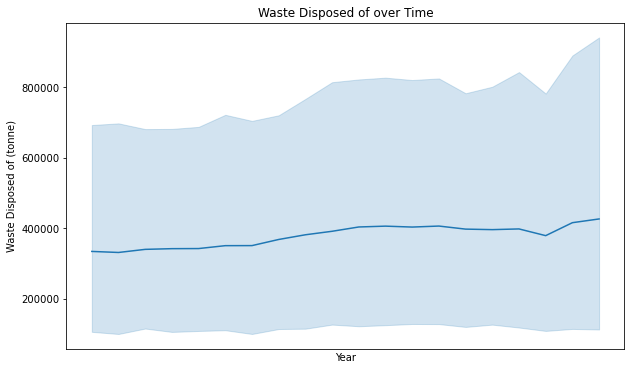

In [14]:
# Convert 'year' column to datetime type
data['year'] = pd.to_datetime(data['year'])

# Plot line chart of waste_disposed_of_tonne over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='waste_disposed_of_tonne', data=data)
plt.xlabel('Year')
plt.ylabel('Waste Disposed of (tonne)')
plt.title('Waste Disposed of over Time')
plt.show()